# Qiskit for quantum computing
An open-source quantum computing software development framework for leveraging today's quantum processors in research, education, and business.
Website: <code>https://qiskit.org/</code><br>
Github: <code>https://github.com/Qiskit/</code><br>
Youtube: <code>https://www.youtube.com/playlist?list=PLOFEBzvs-Vvp2xg9-POLJhQwtVktlYGbY</code>

In [1]:
import numpy as np
from qiskit.tools.monitor import job_monitor
from qiskit import(QuantumCircuit, execute, Aer)
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_state_city

## Part 0: Getting started with Qiskit


Total count for 00 and 11 are: {'00': 49957, '11': 50043}


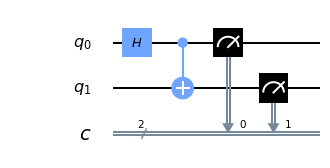

In [2]:
# Use Aer's qasm_simulator
simulator = Aer.get_backend('qasm_simulator')

# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(2, 2)

# Add a H gate on qubit 0
circuit.h(0)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(0, 1)

# Map the quantum measurement to the classical bits
circuit.measure([0,1], [0,1])

# Execute the circuit on the qasm simulator
job = execute(circuit, simulator, shots=10**5)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(circuit)
print("\nTotal count for 00 and 11 are:",counts)

# Draw the circuit
circuit.draw(output='mpl')

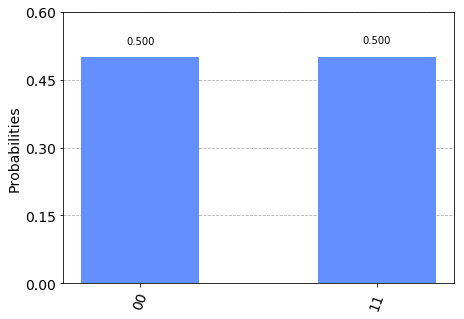

In [3]:
# Plot a histogram
plot_histogram(counts)

## Part I: Fundamentals

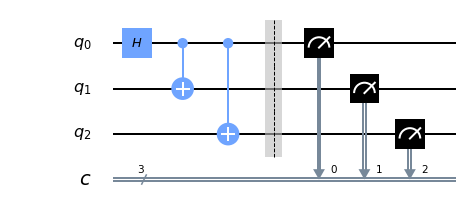

In [5]:
circ = QuantumCircuit(3)
# Add a H gate on qubit 0, putting this qubit in superposition.
circ.h(0)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.
circ.cx(0, 1)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 2, putting
# the qubits in a GHZ state.
circ.cx(0, 2)

# Create a Quantum Circuit
meas = QuantumCircuit(3, 3)
meas.barrier(range(3))

# map the quantum measurement to the classical bits
meas.measure(range(3),range(3))

# The Qiskit circuit object supports composition using the addition operator.
qc = circ+meas

#drawing the circuit
qc.draw(output='mpl')

In [6]:
# Use Aer's qasm_simulator
backend_sim = Aer.get_backend('qasm_simulator')

# We've set the number of repeats of the circuit to be 1024, which is the default.
job_sim = execute(qc, backend_sim, shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()
counts = result_sim.get_counts(qc)
print(counts)

{'000': 505, '111': 519}


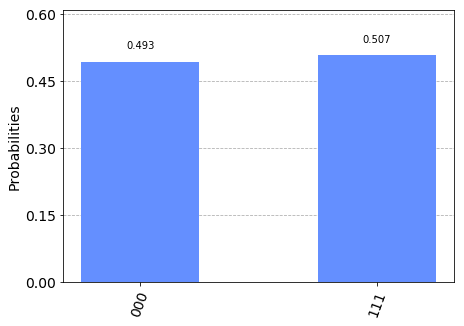

In [7]:
plot_histogram(counts)

In [9]:
# USING IBM ACCOUNT
from qiskit import IBMQ
#IBMQ.save_account('Token')
IBMQ.load_account()
IBMQ.providers()

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]

In [10]:
provider = IBMQ.get_provider(group='open')
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [11]:
backend = provider.get_backend('ibmq_essex')
job_exp = execute(qc, backend=backend)
job_monitor(job_exp)

Job Status: job has successfully run


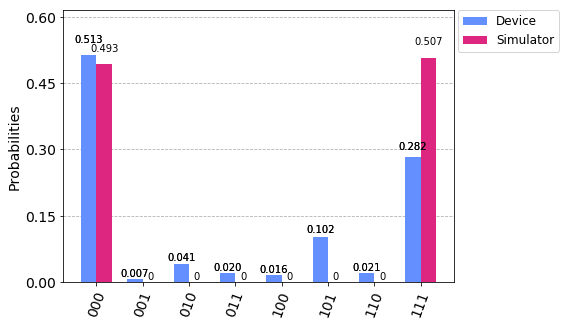

In [12]:
result_exp = job_exp.result()
counts_exp = result_exp.get_counts(qc)
plot_histogram([counts_exp,counts], legend=['Device', 'Simulator'])

In [14]:
from qiskit import *
from qiskit.tools.visualization import plot_bloch_multivector

[0.+0.j 1.+0.j]


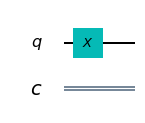

In [16]:
# Create a circuit with one Qbit and one Classical bit
circuit = QuantumCircuit(1, 1) 
circuit.x(0)
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit, backend = simulator).result()
statevector = result.get_statevector()
print(statevector)
%matplotlib inline
circuit.draw(output='mpl')

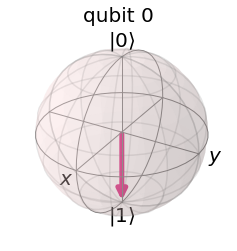

In [17]:
plot_bloch_multivector(statevector)

In [21]:
# Create a circuit with one Qbit and one Classical bit
circuit = QuantumCircuit(1, 1) 
circuit.x(0)
simulator = Aer.get_backend('unitary_simulator')
result = execute(circuit, backend = simulator).result()
unintary = result.get_unitary()
print(statevector)

[0.+0.j 1.+0.j]
